# CHAPTER 2.5

### Classifying images with a pre-trained network using the Keras API

In this section, we'll use a pre-trained network on ImageNet to classify a custom image. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import *
from tensorflow.keras.preprocessing.image import *

We will use 'InceptionV3' network  which is pre-trained on ImageNet:

In [2]:
model = InceptionV3(weights='imagenet')

In [3]:
model

In [4]:
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
 array([[[[-4.59105551e-01, -4.14526574e-02, -3.62577499e-03,
           -9.87672508e-02, -3.37070860e-02,  4.79929037e-02,
            2.32542142e-01,  3.23927671e-01,  5.90160079e-02,
            9.47738215e-02,  4.24996056e-02,  1.26620471e-01,
            1.33215979e-01,  1.22741833e-01, -7.92686343e-02,
            2.08227970e-02, -1.99647829e-01, -3.02687973e-01,
           -2.10659921e-01, -3.52898419e-01, -5.58023095e-01,
            3.20223093e-01,  4.53596050e-03, -3.09266411e-02,
           -6.86957911e-02,  2.00968519e-01,  1.14542745e-01,
            2.40372881e-01,  1.52943470e-02,  5.96231259e-02,
           -5.85714653e-02,  8.78173351e-01],
          [ 3.16376328e-01, -4.78494260e-03, -6.84681814e-03,
            7.44503662e-02, -1.97458476e-01,  5.20143658e-02,
           -1.24460436e-01,  3.36123914e-01,  3.01678218e-02,
           -1.26477107e-01, -1.05597451e-01, -5.31241074e-02,
           -

In [6]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [7]:
from PIL import Image
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [8]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='inceptionV3_from_7th_notebook.jpg')

InceptionV3 takes a 299x299x3 image, which we can see this from model summary or plot. Because of that we should load image according to this size

In [9]:
image = load_img('dog.jpg', target_size=(299, 299))
#convert to array 
image = img_to_array(image)

In [10]:
image

array([[[180., 173., 181.],
        [179., 174., 181.],
        [179., 174., 181.],
        ...,
        [174., 164., 165.],
        [174., 164., 165.],
        [174., 164., 165.]],

       [[180., 173., 181.],
        [179., 174., 181.],
        [179., 174., 181.],
        ...,
        [174., 164., 165.],
        [174., 164., 165.],
        [174., 164., 165.]],

       [[180., 173., 181.],
        [179., 174., 181.],
        [179., 174., 181.],
        ...,
        [174., 164., 165.],
        [174., 164., 165.],
        [174., 164., 165.]],

       ...,

       [[149., 147.,  99.],
        [149., 147.,  99.],
        [149., 147.,  99.],
        ...,
        [138., 134.,  89.],
        [138., 134.,  89.],
        [138., 134.,  89.]],

       [[149., 146., 101.],
        [149., 146., 101.],
        [149., 147.,  99.],
        ...,
        [138., 134.,  89.],
        [138., 134.,  89.],
        [138., 134.,  89.]],

       [[148., 145., 104.],
        [148., 145., 102.],
        [149., 1

In [11]:
image.shape

(299, 299, 3)

We should add dimension to try this image on our model(wrap it into a singleton batch)

In [12]:
image = np.expand_dims(image, axis=0)

In [13]:
image.shape

(1, 299, 299, 3)

In [14]:
#preprocess image as the InceptionV3 model does
image = preprocess_input(image)

In [15]:
image

array([[[[ 0.41176474,  0.35686278,  0.41960788],
         [ 0.4039216 ,  0.36470592,  0.41960788],
         [ 0.4039216 ,  0.36470592,  0.41960788],
         ...,
         [ 0.36470592,  0.28627455,  0.2941177 ],
         [ 0.36470592,  0.28627455,  0.2941177 ],
         [ 0.36470592,  0.28627455,  0.2941177 ]],

        [[ 0.41176474,  0.35686278,  0.41960788],
         [ 0.4039216 ,  0.36470592,  0.41960788],
         [ 0.4039216 ,  0.36470592,  0.41960788],
         ...,
         [ 0.36470592,  0.28627455,  0.2941177 ],
         [ 0.36470592,  0.28627455,  0.2941177 ],
         [ 0.36470592,  0.28627455,  0.2941177 ]],

        [[ 0.41176474,  0.35686278,  0.41960788],
         [ 0.4039216 ,  0.36470592,  0.41960788],
         [ 0.4039216 ,  0.36470592,  0.41960788],
         ...,
         [ 0.36470592,  0.28627455,  0.2941177 ],
         [ 0.36470592,  0.28627455,  0.2941177 ],
         [ 0.36470592,  0.28627455,  0.2941177 ]],

        ...,

        [[ 0.1686275 ,  0.15294123, -0

Now we can predict and show the results

In [16]:
predictions = model.predict(image)

In [17]:
predictions

array([[3.10948613e-04, 7.92829305e-05, 1.10641980e-04, 7.73286301e-05,
        2.25982512e-04, 1.56565613e-04, 5.64528127e-05, 8.48432319e-05,
        6.95641502e-05, 4.94650740e-04, 1.87523765e-04, 2.53846229e-04,
        1.12228816e-04, 1.04500970e-04, 7.70716069e-05, 8.47545161e-05,
        8.03543153e-05, 2.93947989e-04, 9.05723646e-05, 1.23924241e-04,
        7.19970703e-05, 1.75296504e-04, 9.73872229e-05, 4.20565833e-04,
        1.95679022e-04, 1.99967835e-04, 1.27440100e-04, 2.65044742e-04,
        2.64208880e-04, 7.40168252e-05, 1.12284710e-04, 1.18146650e-04,
        1.70234227e-04, 6.89511435e-05, 9.42907136e-05, 7.37720766e-05,
        1.08793116e-04, 1.29502310e-04, 1.28686064e-04, 1.37246490e-04,
        1.03718397e-04, 1.33560534e-04, 1.56623413e-04, 9.10710005e-05,
        1.52647772e-04, 1.30371220e-04, 9.78903263e-05, 1.06186824e-04,
        1.09807341e-04, 1.64373472e-04, 1.23364851e-04, 4.04389939e-05,
        2.24548319e-04, 2.29762212e-04, 2.50992220e-04, 4.109102

In [18]:
predictions.shape

(1, 1000)

The Imagenet has 1000 class and our model is pretrained on this dataset... As a result, we have 1000 probability score for each class. and also you can understand this from model summary if you check the last layes of model

In [19]:
prediction_matrix = (imagenet_utils
                     .decode_predictions(predictions))

In [20]:
prediction_matrix

[[('n02110958', 'pug', 0.85510063),
  ('n02112706', 'Brabancon_griffon', 0.0062584514),
  ('n02108915', 'French_bulldog', 0.005579411),
  ('n02096585', 'Boston_bull', 0.0021130354),
  ('n02108422', 'bull_mastiff', 0.0012984592)]]

In [26]:
type(prediction_matrix)

list

In [27]:
prediction_matrix[0]

[('n02110958', 'pug', 0.85510063),
 ('n02112706', 'Brabancon_griffon', 0.0062584514),
 ('n02108915', 'French_bulldog', 0.005579411),
 ('n02096585', 'Boston_bull', 0.0021130354),
 ('n02108422', 'bull_mastiff', 0.0012984592)]

In [29]:
prediction_matrix[0][0]

('n02110958', 'pug', 0.85510063)

by the help of imagenet.utils, we find the 5 highest probability from our prediction and show their labels and their confidence score. It is not very suitable for an untechnical person... lets make it readable

In [30]:
for i in range(5):
    imagenet_id, label, probability = prediction_matrix[0][i]
    print(f'{i + 1}. {label}: {probability * 100:.3f}%')

1. pug: 85.510%
2. Brabancon_griffon: 0.626%
3. French_bulldog: 0.558%
4. Boston_bull: 0.211%
5. bull_mastiff: 0.130%


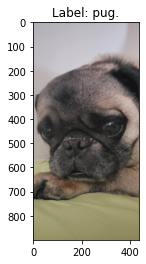

In [31]:
_, label, _ = prediction_matrix[0][0]
plt.figure()
plt.title(f'Label: {label}.')
original = load_img('dog.jpg')
original = img_to_array(original)
plt.imshow(original / 255.0)
plt.show()

 FOR MORE : https://www.tensorflow.org/api_docs/python/tf/keras/applications.